In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
#from torchinfo import summary
#from torchviz import make_dot
#from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torch.nn import functional as F
from torch import nn
SEED = 123

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'figure.dpi': 100})
mpl.rcParams.update({'figure.autolayout': False})
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "DejaVu Serif"
mpl.rcParams['mathtext.fontset'] = "cm"
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [52]:
n_latent = 4
Mean_shape_value = np.zeros((4,4000))
shap_values = np.load('data/shap_values.npy')
for i in range(n_latent):
    Mean_shape_value[i] = np.mean( abs( shap_values[i] ), axis = 0 )

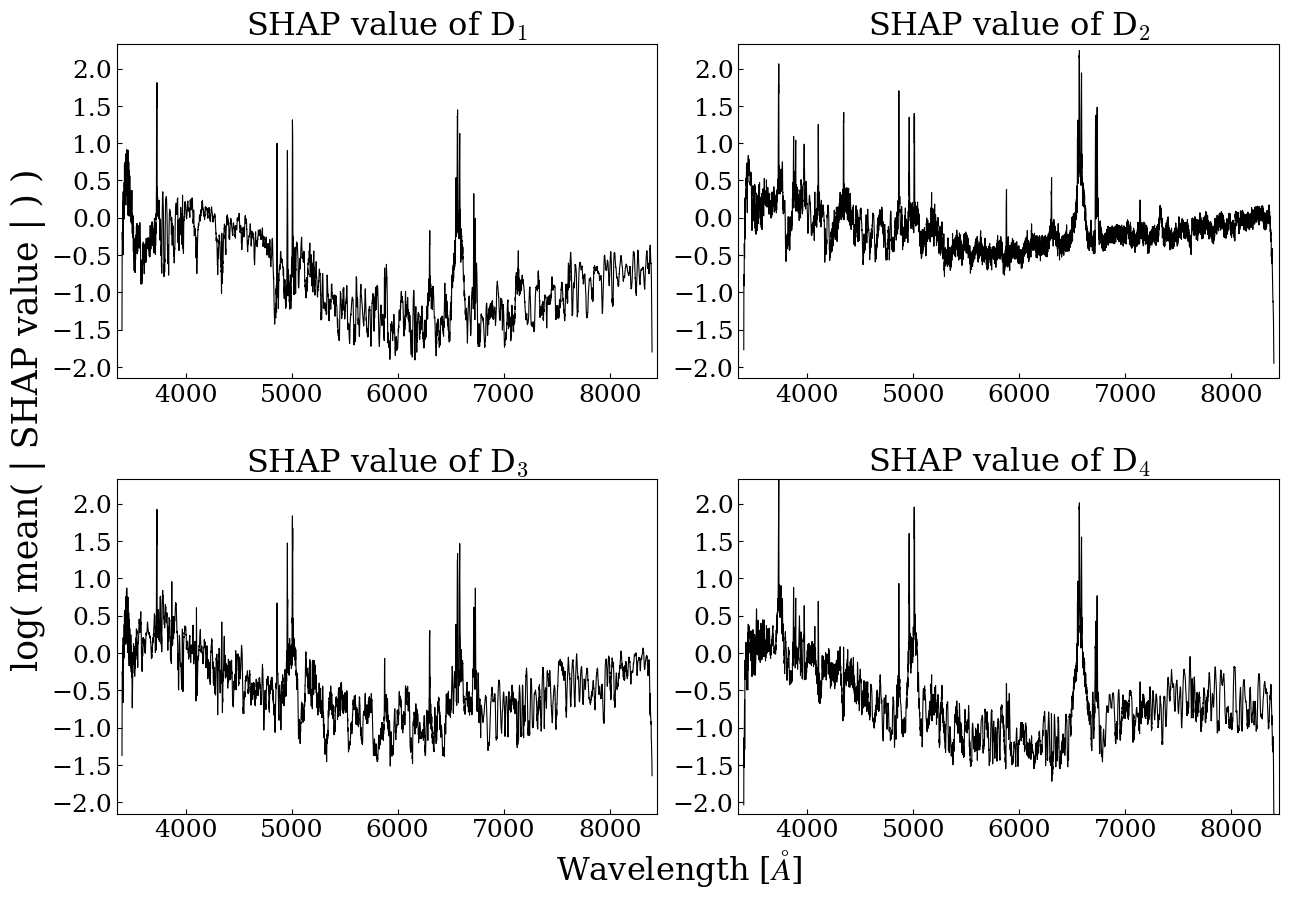

In [53]:
wave_range = np.linspace(3400,8400,4000)
plt.figure(
    figsize=(15,10)
)
plt.subplots_adjust(wspace=0.15, hspace=0.3)
for i in range(n_latent):
    plt.subplot(2,2,i+1)
    A = np.log10( Mean_shape_value[i] )
    plt.plot(
        wave_range, A,
        lw = .8,c = 'k'
    )
    #plt.hlines(0,3400,8400,color= 'k',ls='--',lw=1)
    
    if i == 2:
        j = 'log( mean( | SHAP value | ) )'
        plt.ylabel(j, fontsize=25, y=1.18)
        j = 'Wavelength [$\AA$]'
        plt.xlabel(j,fontsize = 23,x = 1.04)
        
    plt.title(
        'SHAP value of D$_{}$'.format(i+1),
        fontsize = 23
    )
    plt.ylim(
        np.log10( Mean_shape_value ).min(),
        np.log10( Mean_shape_value ).max()
        )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(3350,8450)
    
    plt.savefig('Figure/SHAP values VAE4.pdf',bbox_inches="tight",dpi=200)
plt.show()

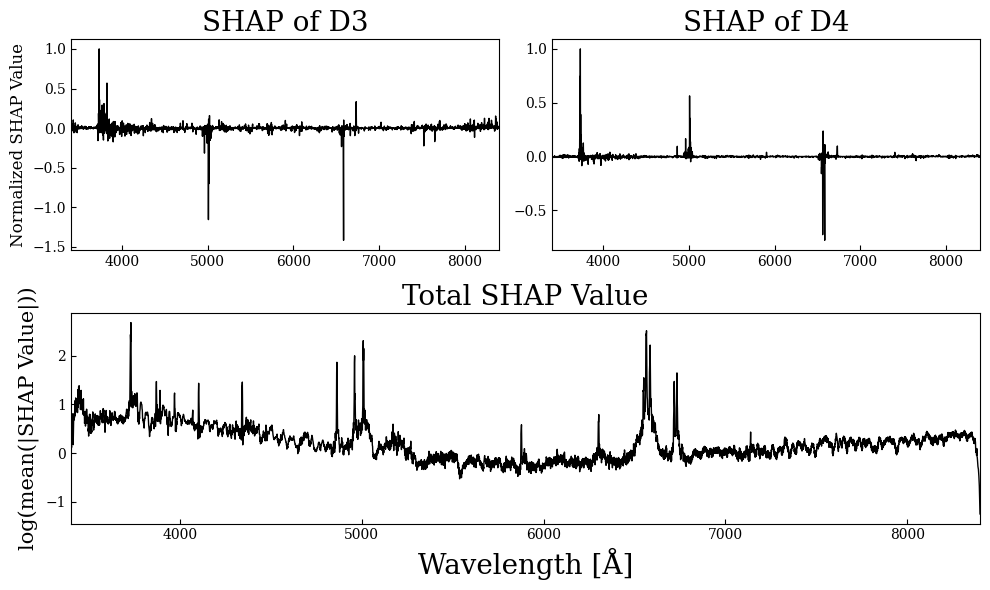

In [54]:
import matplotlib.gridspec as gridspec

# Create a figure with custom GridSpec
fig = plt.figure(figsize=(10, 6))

# Set up GridSpec with 2 rows and 2 columns
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
j = 0
# First subplot - top left
ax = plt.subplot(gs[0, 0])
ax.plot( wave_range, shap_values[2][j]/shap_values[2][j].max(), c='k', lw=1 ) 
ax.set_title('SHAP of D3',fontsize=20)
ax.set_ylabel('Normalized SHAP Value',fontsize=12)
ax.set_xlim(3400,8400)

# First subplot - top right
ax = plt.subplot(gs[0, 1])
ax.plot( wave_range, shap_values[3][j]/shap_values[3][j].max(), c='k', lw=1 ) 
ax.set_title('SHAP of D4',fontsize=20)
ax.set_xlim(3400,8400)

# Third subplot - bottom spanned across
ax = plt.subplot(gs[1, :])  # Spanning entire width of figure
ax.plot( wave_range, np.log10( np.sum( Mean_shape_value, axis=0 ) ), c='k', lw=1 )  # Adding 1 to avoid log(0)
ax.set_title('Total SHAP Value',fontsize=20)
ax.set_ylabel('log(mean(|SHAP Value|))',fontsize=15)
ax.set_xlabel('Wavelength [Å]',fontsize=20)
ax.set_xlim(3400,8400)
# Adjust layout for a better fit
plt.tight_layout()
plt.savefig('Figure/SHAP values VAE4.pdf',bbox_inches="tight",dpi=200)
# Show plot
plt.show()